In [53]:
import torch
DATA = 'SVHN'
prefix = 'svhn_cnn_'
traing = True
epochs = 200
batch_size = 64
leaks_loss = None
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [54]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
pip install import-ipynb

In [56]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [57]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))

Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/train_32x32.mat
Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/test_32x32.mat



73257 18222 7810 26032


##Visualising the data

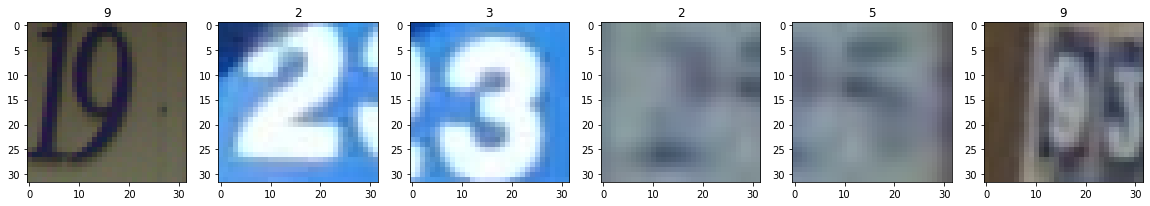

In [58]:
plot_samples(trainSet, None)

In [59]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            nn.Conv2d(3, 6, 5, 1, 1), #28
            nn.ReLU(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [60]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [61]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model()

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.82169694 and Accuracy: 75.41%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.63233882 and Accuracy: 81.35%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.55773914 and Accuracy: 83.33%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.53452194 and Accuracy: 83.94%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.49702454 and Accuracy: 85.53%
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.49453050 and Accuracy: 85.13%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.47154245 and Accuracy: 85.81%
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.46237367 and Accuracy: 86.35%
Saving the model state dictionary for Epoch: 9 with Validation loss: 0.45186910 and Accuracy: 86.37%
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.44642907 and Accura

In [62]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.8992, device='cuda:0')


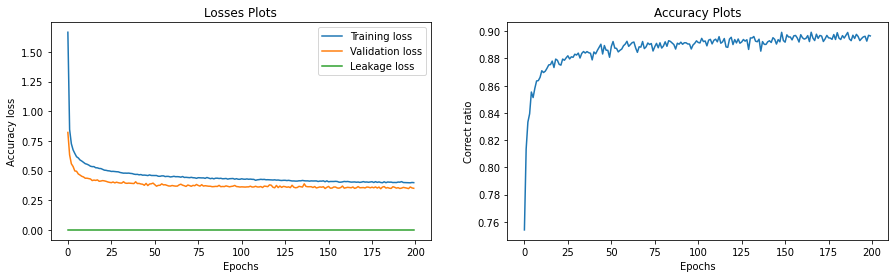

In [63]:
plot_losses()


Test accuracy: 0.9003841229193342


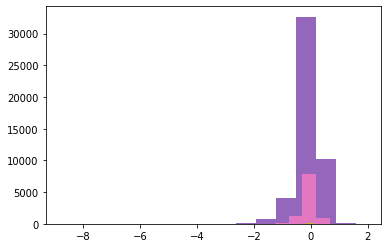

In [64]:
test_model()

##Measuring Privacy Preserving

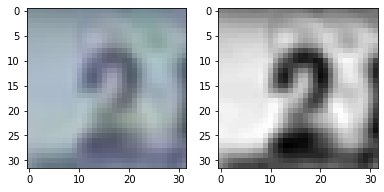

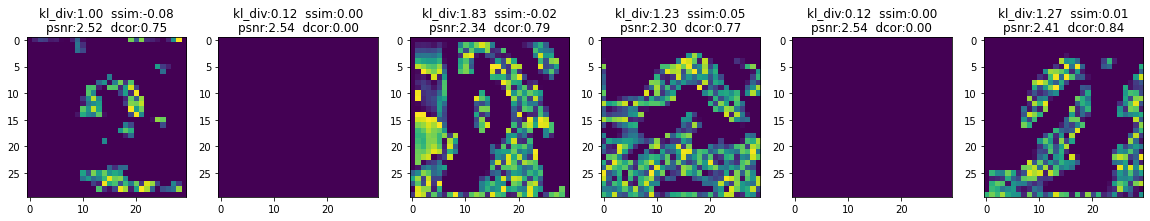

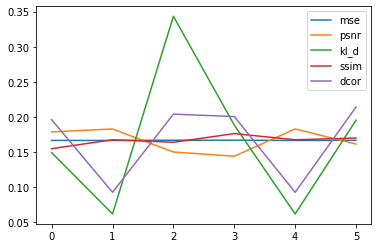

In [65]:
plot_measure(measure_image(testSet[1][0]))


tensor(1.1402, device='cuda:0') 0.4959346751109039 tensor(0.0374, device='cuda:0')


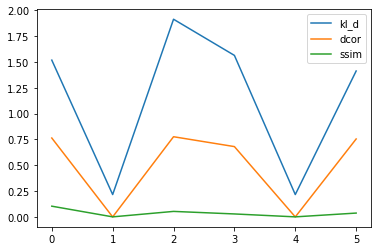

In [66]:
plot_measures(measure_images())